In [1]:
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from scipy.stats.distributions import beta
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from pyDOE3 import lhs

In [3]:
stats = pd.read_csv('/workspace/MedicalImageClassficationData/CoronaHack-Chest X-Ray-Dataset/Chest_xray_Corona_Metadata.csv')

In [4]:
stats[stats['X_ray_image_name']=='IM-0128-0001.jpeg']

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN


In [18]:
np.isnan(stats[stats['X_ray_image_name']=='IM-0128-0001.jpeg']['Dataset_type'].values[0])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [3]:
datapath = Path('/workspace/MedicalImageClassficationData/PAD-UFES-20/')
all_data = datapath.rglob('*.png')
all_images = [Image.open(str(x)) for x in all_data]
all_size = [np.array(x).shape  for x in all_images]

In [8]:
with open('./MFPSO_data.pkl','rb') as f:
    result = pickle.load(f)
sampled_policies = []
task_id = []
for rep in result:
    Pops = rep['Pops']
    factors = (rep['SkillFactor'])
    for i in range(1, len(Pops)):
        sampled_policies.append(np.array(Pops[i]))
        task_id.append(np.array(factors[i]))
sampled_policies = np.concatenate(sampled_policies)
task_id = np.concatenate(task_id)

# Pops = result[0]['Pops']
# Fval = result[0]['Fval']
# SkillFactor = result[0]['SkillFactor']

In [10]:
with open('./training_data_lym_500.pkl', 'rb') as f:
    result = pickle.load(f)
    result['sampled_policies'] = sampled_policies
    result['task_id'] = task_id
with open('./training_data_lym.pkl','wb') as f:
    pickle.dump(result,f)

ValueError: x and y must be the same size

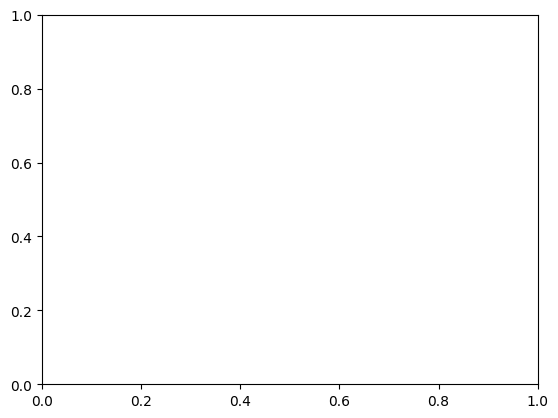

In [9]:
x = list(range(len(Fval)))
plt.scatter(x, Fval[0])

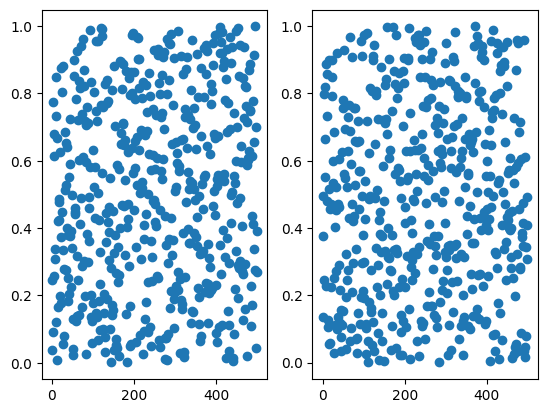

In [5]:
sample_num = 500
x = list(range(sample_num))
a = lhs(1, sample_num, criterion='center')
# b = lhs(1, sample_num, criterion='lhsmu')
b = np.random.rand(sample_num)
fig, ax = plt.subplots(1, 2)
ax[0].scatter(x,a)
ax[1].scatter(x,b)

In [9]:
with open('./training_data_lym_500.pkl','rb') as f:
    result = pickle.load(f)

In [10]:
x = list(range(len(result['labels'][0])))
y = result['labels'][0]

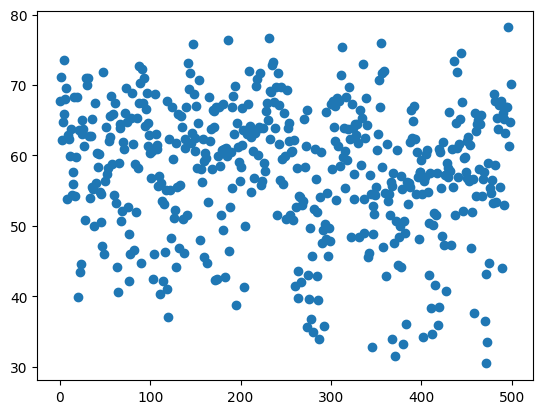

In [11]:
plt.scatter(x, y)
plt.show()

In [5]:
s = result['sampled_policies'][0]
ts = np.floor(s*14)

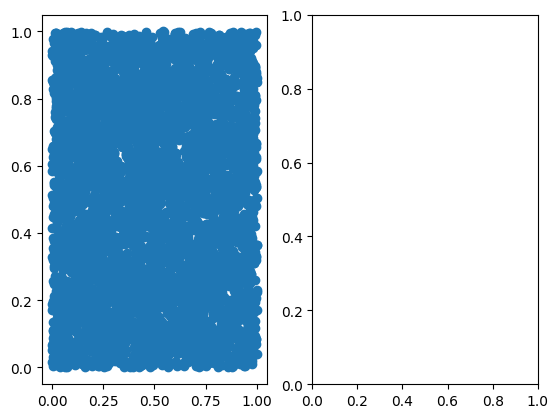

In [43]:
b = 2
a = 1
x = np.linspace(0,1,len(s))
fig, ax = plt.subplots(1, 2)
ax[0].scatter(s[:,0],s[:,1])
# ax[0].scatter(x, np.floor(s[:,0]*14))
# ax[1].scatter(x, np.floor(beta.ppf(s[:,0],a,b)*14))